# Курсовая работа, Фундаментальные концепции ИИ
## Credit Card Fraud Detection
#### Алапанова Эльза, М8О-109СВ-24

### 1. Описание датасета

**Credit Card Fraud Detection** — это популярный датасет для задач классификации, связанный с обнаружением мошеннических операций с кредитными картами. Данные включают транзакции европейских клиентов и содержат 284,807 строк и 31 столбец. 

- **Источник**: Датасет доступен в [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).
- **Цель**: Выявление мошеннических операций (целевая переменная `Class`, где 1 — мошенничество, 0 — нормальная операция).
- **Особенности**:
  - Большинство признаков (V1, V2, ..., V28) анонимизированы через PCA.
  - Два дополнительных столбца: `Time` (время с начала первой транзакции) и `Amount` (сумма операции).
  - Датасет сильно несбалансирован (мошеннические операции составляют ~0.17%).

#### Пример данных
Вот пример нескольких строк из датасета:  
| Time  | V1      | V2      | ... | Amount | Class |
|-------|---------|---------|-----|--------|-------|
| 0     | -1.3598 | -0.0727 | ... | 149.62 | 0     |
| 0     | 1.1918  | 0.2662  | ... | 2.69   | 0     |
| 1     | -1.3584 | -1.3402 | ... | 378.66 | 1     |

---

#### Работа с датасетом
для `PyTorch` реализуем класс `Dataset` для загрузки данных.



In [6]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class CreditCardFraudDataset(Dataset):
    def __init__(self, file_path, train=True, test_size=0.2, random_state=42):
        data = pd.read_csv(file_path)
        train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)
        self.data = train_data if train else test_data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        X = torch.tensor(row.drop('Class').values, dtype=torch.float32)
        y = torch.tensor(row['Class'], dtype=torch.float32)
        return X, y

# Пример использования
file_path = "creditcard.csv"
dataset = CreditCardFraudDataset(file_path)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Получение первого батча
for batch in dataloader:
    X, y = batch
    
    # Конвертируем в читаемый формат
    df_features = pd.DataFrame(X.numpy(), columns=[f'Feature_{i}' for i in range(X.shape[1])])
    df_labels = pd.DataFrame(y.numpy(), columns=['Class'])
    
    # Объединяем признаки и метки в один DataFrame для удобного вывода
    df_batch = pd.concat([df_features, df_labels], axis=1)
    print("Пример батча данных:")
    print(df_batch.head())  # Вывод первых 5 строк батча
    break


Пример батча данных:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    81465.0  -1.439204   0.442595   1.128589  -1.622790  -0.705898   
1    67961.0  -1.584244   1.481965   0.657228  -1.297542  -0.560323   
2    53599.0   1.439209  -1.188270   0.393796  -1.471233  -1.489879   
3   162528.0  -0.316006   0.693406   0.676383  -0.513195   0.620758   
4    54129.0   1.296816  -1.451074   0.216769  -1.420204  -1.452775   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0  -0.986469  -0.045463  -0.609013  -1.717294  ...    1.053915    0.315718   
1  -1.038111   0.227141   0.360611   0.419401  ...    0.004757   -0.078612   
2  -0.279817  -1.240435   0.158390  -1.785284  ...   -0.162032   -0.170294   
3   0.338150   0.406950   0.271489  -0.178435  ...   -0.211769   -0.710761   
4  -0.395740  -0.918207  -0.154799  -1.686148  ...   -0.341932   -0.942841   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0   -0

### 2. Статистика по данным

#### Объем данных
- **Количество строк (наблюдений)**: 284,807
- **Количество столбцов (фичей)**: 31  
  Включая:
  - **1 целевая переменная** (`Class`): указывает на факт мошенничества (1) или его отсутствие (0).
  - **30 признаков**, из которых 28 анонимизированы (`V1`–`V28`), и 2 оригинальные — `Time` и `Amount`.

---

#### Разбиение по классам
- **Нормальные операции (Class = 0)**: 284,315 (~99.83%)  
- **Мошеннические операции (Class = 1)**: 492 (~0.17%)  
- **Дисбаланс классов**: Данные сильно несбалансированы, мошенничество составляет лишь малую долю от общего объема.

---

#### Пропуски и типы данных
- **Количество пропущенных значений**: Отсутствуют. Все значения в датасете представлены.
- **Типы данных**:
  - `Time` и `Amount`: числовые (float64).
  - `V1`–`V28`: числовые (float64), полученные методом PCA.
  - `Class`: целое число (int64).

---

#### Распределение признаков
Покажем основные статистические метрики:
- Среднее, медиана, минимум и максимум для `Time` и `Amount`.
- Примеры для анонимизированных признаков (например, `V1`).


In [2]:
# Загрузка данных
file_path = "creditcard.csv"
data = pd.read_csv(file_path)

# Общая информация
print("Общая информация о данных:")
print(data.info())

# Описательная статистика
print("\nОписательная статистика:")
print(data.describe())

# Проверка на пропуски
missing_values = data.isnull().sum()
print("\nКоличество пропусков в данных:")
print(missing_values[missing_values > 0])

# Распределение классов
class_distribution = data['Class'].value_counts(normalize=True) * 100
print("\nРаспределение классов (в процентах):")
print(class_distribution)

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nu

#### Графическое представление
- **Распределение классов** (гистограмма или круговая диаграмма).
- **Распределение суммы транзакций (`Amount`)**:
  - График плотности (для визуализации разброса значений).
- **Распределение признаков PCA** (например, `V1`):
  - Построить гистограмму или боксплот.

Пример визуализации:

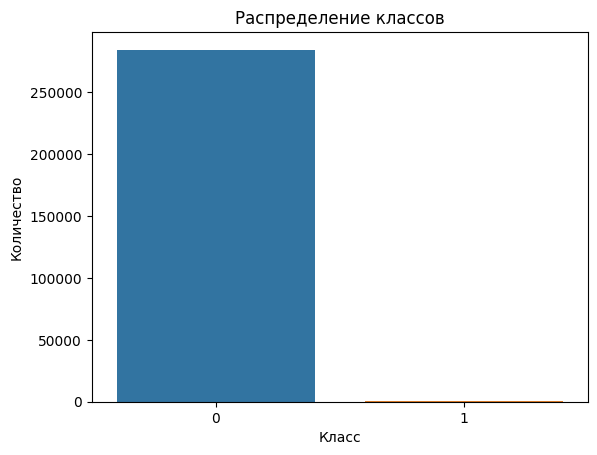

C:\Users\Эльза\AppData\Local\Temp\ipykernel_19572\2631524856.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Amount'], shade=True)


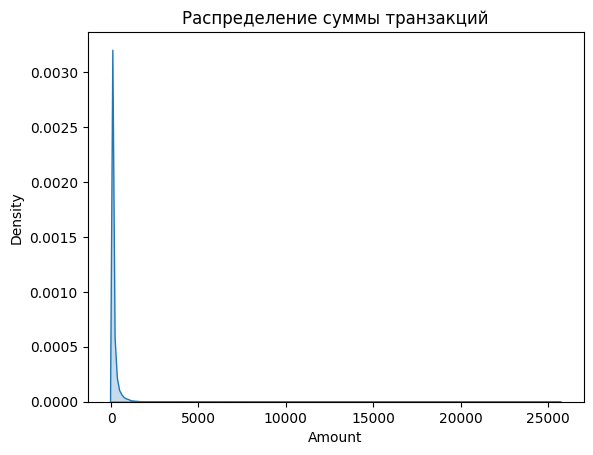

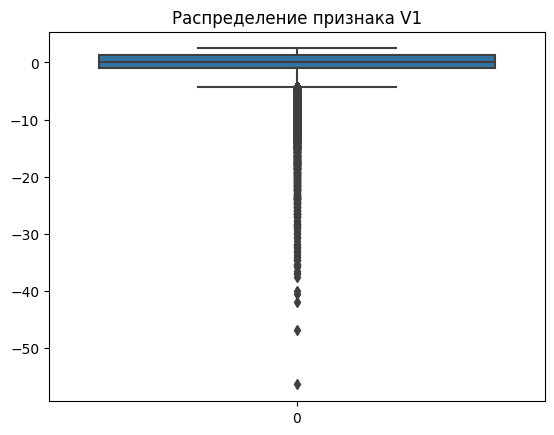

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма распределения классов
sns.countplot(x='Class', data=data)
plt.title("Распределение классов")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()


# График плотности для Amount
sns.kdeplot(data['Amount'], shade=True)
plt.title("Распределение суммы транзакций")
plt.show()

# Боксплот для V1
sns.boxplot(data=data['V1'])
plt.title("Распределение признака V1")
plt.show()


### 3. Алгоритм

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
dataset = pd.read_csv("creditcard.csv")
dataset.head().append(dataset.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


<AxesSubplot:ylabel=' '>

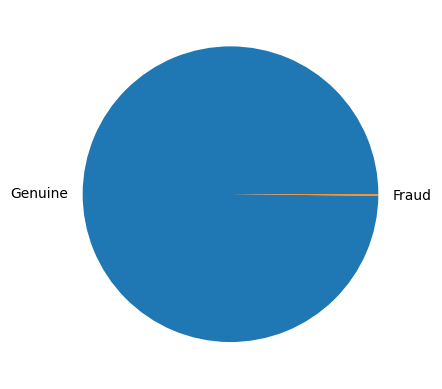

In [14]:
# проверка пропорций
print("Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])))
print("Valid Transactions: " + str(len(dataset[dataset["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))

# добавление текстовых меток для классов 
data_p = dataset.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# построение круговой диаграммы
data_p[" "].value_counts().plot(kind="pie")

C:\Users\Эльза\AppData\Local\Temp\ipykernel_19572\3670551516.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
c:\Users\Эльза\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Эльза\AppData\Local\Temp\ipykernel_19572\3670551516.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

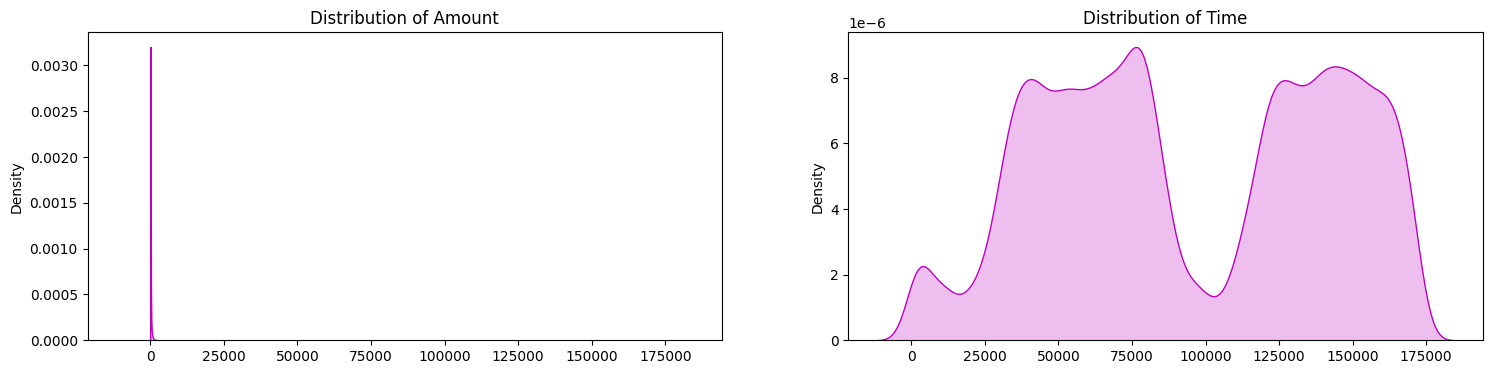

In [16]:
# Визуализация распределений признаков 'Amount' (сумма транзакции) и 'Time' (время транзакции)

# Создание подграфиков для двух признаков ('Amount' и 'Time')
f, axes = plt.subplots(1, 2, figsize=(18, 4), sharex=True)  # 1 строка, 2 столбца, общий масштаб по оси x

# Получение значений столбцов 'Amount' и 'Time'
amount_value = dataset['Amount'].values  # Значения столбца "Amount" (сумма транзакции)
time_value = dataset['Time'].values     # Значения столбца "Time" (время транзакции)

# Построение графика распределения для 'Amount'
sns.distplot(
    amount_value,  # Данные для построения распределения
    hist=False,    # Не отображать гистограмму
    color="m",     # Цвет графика (магентовый)
    kde_kws={"shade": True},  # Включение заливки под графиком
    ax=axes[0]     # Построение на первом подграфике
).set_title('Distribution of Amount')  # Установка заголовка графика

# Построение графика распределения для 'Time'
sns.distplot(
    time_value,    # Данные для построения распределения
    hist=False,    # Не отображать гистограмму
    color="m",     # Цвет графика (магентовый)
    kde_kws={"shade": True},  # Включение заливки под графиком
    ax=axes[1]     # Построение на втором подграфике
).set_title('Distribution of Time')  # Установка заголовка графика

# Отображение графиков
plt.show()


Есть ли какая-либо разница между действительными транзакциями и мошенническими:

In [17]:
print("Average Amount in a Fraudulent Transaction: " + str(dataset[dataset["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(dataset[dataset["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821139
Average Amount in a Valid Transaction: 88.29102242231328


Как можно заметить, средняя денежная транзакция для мошеннических больше. Это делает эту проблему крайне важной

In [18]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(dataset["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


C:\Users\Эльза\AppData\Local\Temp\ipykernel_19572\484137474.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
c:\Users\Эльза\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Эльза\AppData\Local\Temp\ipykernel_19572\484137474.py:12: UserWarning: 

`distplot` is a deprecated function and w

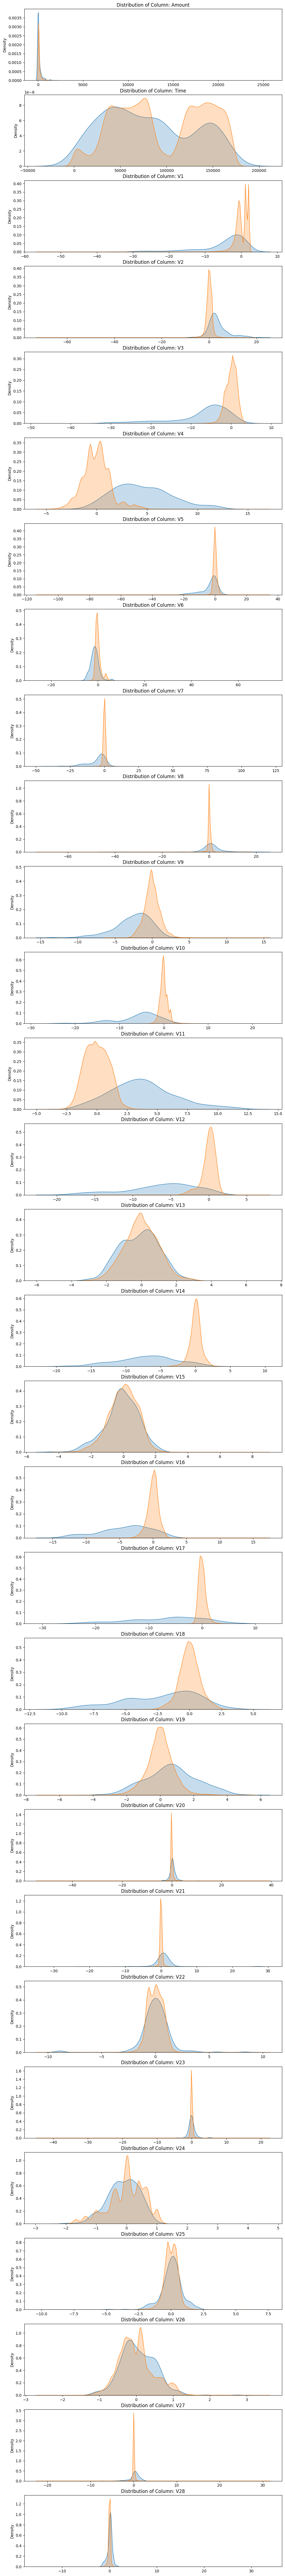

In [19]:
data_plot = dataset.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()

#### Подготовка данных
Проверяем наличие пропущенных значений

In [20]:
# Подготовка данных
# Поскольку признаки были созданы с использованием PCA, отбор признаков не требуется.
# Следующим шагом проверяем наличие пропущенных значений в датасете.

# Проверяем, есть ли пропущенные значения в датасете
dataset.isnull().shape[0]  # Количество строк с ненулевыми значениями

# Печатаем информацию о ненулевых и пропущенных значениях
print("Non-missing values: " + str(dataset.isnull().shape[0]))  # Количество строк без пропусков
print("Missing values: " + str(dataset.shape[0] - dataset.isnull().shape[0]))  # Количество строк с пропущенными значениями


Non-missing values: 284807
Missing values: 0


После проверки на отсутствие пропущенных данных следующим шагом является стандартизация некоторых признаков. Стандартизация необходима, чтобы привести значения признаков к единому масштабу, что особенно важно для алгоритмов машинного обучения, чувствительных к масштабу данных.

В данном случае стандартизации подвергаются только два признака:

Time — время транзакции.
Amount — сумма транзакции.
Эти признаки стандартизируются, так как они имеют разные масштабы значений.

Используется RoburtScaler, потому что Amount содержит выбросы, а RoburtScaler отличается от стандартного скейлера (StandardScaler) тем, что использует медиану и межквартильный размах вместо среднего значения и стандартного отклонения. Это делает его более устойчивым к выбросам 


In [21]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Time", "Amount"]])
dataset[["Time", "Amount"]] = scaler.transform(dataset[["Time", "Amount"]])

dataset.head().append(dataset.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


In [22]:
y = dataset["Class"] # target 
X = dataset.iloc[:,0:30]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

In [25]:
 !pip install imblearn

In [26]:
from imblearn.pipeline import make_pipeline # создание конвейера (пайплайна)
from imblearn.under_sampling import NearMiss  # обработка несбалансированных данных
from imblearn.over_sampling import SMOTE  # Over-sampling с использованием SMOTE 
# метрики для оценки моделей
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Обучение модели

In [27]:
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  
print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1 score is 0.8636363636363635


Как видно, в нашем датасете было всего 0.17% мошеннических транзакций, и модель, предсказывающая все транзакции как законные, имела бы точность 99.83%. К счастью, наша модель превзошла этот показатель и достигла более 99.96%.

Таким образом, точность не является подходящей метрикой для нашей задачи. Вместо этого следует рассматривать три другие метрики:

- **Точность (Precision):** Это общее количество истинно положительных результатов, делённое на сумму истинно положительных и ложноположительных. Точность помогает нам избежать того, чтобы законные транзакции ошибочно классифицировались как мошеннические в нашей задаче.
- **Полнота (Recall):** Это общее количество истинно положительных результатов, делённое на сумму истинно положительных и ложноотрицательных. Полнота гарантирует, что мошеннические транзакции не будут ошибочно предсказаны как законные, что позволило бы достичь высокой точности, но с плохой моделью.
- **F1-мера:** Это гармоническое среднее точности и полноты. Она даёт хороший баланс между обеими метриками.

Для нашей задачи полнота более важна, чем точность, поскольку ошибочно классифицировать мошенническую транзакцию как законную намного хуже, чем ошибочно пометить законную транзакцию как мошенническую. Можно использовать функцию `fbeta_score()` и настроить параметр бета, чтобы сделать метрику более ориентированной на полноту.

В следующих разделах мы проведём поиск по сетке и случайный поиск для методов увеличения и уменьшения выборки на различных классификаторах.

### Undersampling

В этом разделе мы выполним уменьшение выборки (undersampling) для нашего датасета. Важно отметить, что мы не будем уменьшать выборку тестовых данных, так как наша цель — сделать модель эффективной при дисбалансированных классах.

Шаги следующие:

1. Используем кросс-валидацию с 5 фолдами на обучающем наборе данных.
2. На каждом из фолдов применяем метод уменьшения выборки.
3. Обучаем модель на обучающих фолдах и проверяем на валидационном фолде.

### Методы NearMiss

Imbalanced-Learn — это Python-модуль, который помогает балансировать датасеты, сильно искажённые или смещённые в сторону определённых классов. Он помогает при ресемплинге классов, которые обычно являются переобразованными или недообразованными. Если соотношение дисбаланса велико, выход будет склоняться к классу с наибольшим количеством экземпляров. Ознакомьтесь с этим [уроком](https://imbalanced-learn.org) для более детального изучения модуля imbalanced-learn.

**Near Miss** — это группа стратегий уменьшения выборки, которые выбирают образцы на основе расстояния между экземплярами классов большинства и меньшинства.

В следующем коде мы создаём гибкую функцию, которая может выполнить поиск по сетке или случайный поиск для заданного оценщика и его параметров с или без использования методов уменьшения или увеличения выборки и возвращает лучший оценщик вместе с метриками производительности.

In [35]:
def get_model_best_estimator_and_metrics(estimator, params, kf=kf, X_train=X_train, 
                                         y_train=y_train, X_test=X_test, 
                                         y_test=y_test, is_grid_search=True, 
                                         sampling=NearMiss(), scoring="f1", 
                                         n_jobs=2):
    if sampling is None:
        # Создаём пайплайн только с оценщиком, чтобы оставшийся код работал корректно
        pipeline = make_pipeline(estimator)
    else:
        # Создаём пайплайн с методом уменьшения выборки (undersampling) и оценщиком
        pipeline = make_pipeline(sampling, estimator)

    # Получаем имя оценщика (модели), чтобы использовать его в пайплайне
    estimator_name = estimator.__class__.__name__.lower()

    # Строим параметры для поиска по сетке или случайного поиска
    new_params = {f'{estimator_name}__{key}': params[key] for key in params}

    if is_grid_search:
        # Если используется поиск по сетке (Grid Search)
        search = GridSearchCV(pipeline, param_grid=new_params, cv=kf, return_train_score=True, n_jobs=n_jobs, verbose=2)
    else:
        # Если используется случайный поиск (Randomized Search)
        search = RandomizedSearchCV(pipeline, param_distributions=new_params, 
                                    cv=kf, scoring=scoring, return_train_score=True,
                                    n_jobs=n_jobs, verbose=1)

    # Обучаем модель
    search.fit(X_train, y_train)

    # Оценка модели с использованием кросс-валидации
    cv_score = cross_val_score(search, X_train, y_train, scoring=scoring, cv=kf)

    # Получаем предсказания для тестовых данных
    y_pred = search.best_estimator_.named_steps[estimator_name].predict(X_test)

    # Вычисляем метрики: полнота (recall), точность (accuracy), F1-меру и другие
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Получаем вероятности предсказаний для вычисления ROC и AUC
    y_proba = search.best_estimator_.named_steps[estimator_name].predict_proba(X_test)[::, 1]

    # Строим кривые FPR (False Positive Rate) и TPR (True Positive Rate)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Вычисляем площадь под кривой ROC (AUC)
    auc = roc_auc_score(y_test, y_proba)

    # Возвращаем лучший оценщик и вычисленные метрики
    return {
        "best_estimator": search.best_estimator_,
        "estimator_name": estimator_name,
        "cv_score": cv_score,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
    }

    


Поскольку данных для обучения модели никогда не бывает достаточно, исключение части данных для валидации может привести к недообучению. Мы рискуем потерять важные закономерности и тренды в данных, снижая количество обучающих данных, что увеличивает ошибку, вызванную смещением. Поэтому нам нужна стратегия, которая обеспечит достаточное количество данных для обучения модели, одновременно оставляя достаточно данных для валидации.

Функция `cross_val_score()` использует кросс-валидацию для определения оценки, которая используется в вышеописанной функции. Ознакомьтесь с этим учебным пособием, чтобы узнать больше о работе этой функции.

Функция была создана с учетом гибкости. Например, если вы хотите выполнить поиск по сетке для модели `LogisticRegression` с использованием undersampling, достаточно использовать следующий код:

In [36]:
# Cumulatively create a table for the ROC curve
## Create the dataframe
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

logreg_us_results = get_model_best_estimator_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 
                  'C': [ 0.01, 0.1, 1, 100], 
                  'solver' : ['liblinear']},
    sampling=NearMiss(),
)
print(f"==={logreg_us_results['estimator_name']}===")
print("Model:", logreg_us_results['best_estimator'])
print("Accuracy:", logreg_us_results['accuracy'])
print("Recall:", logreg_us_results['recall'])
print("F1 Score:", logreg_us_results['f1_score'])
res_table = res_table.append({'classifiers': logreg_us_results["estimator_name"],
                                        'fpr': logreg_us_results["fpr"], 
                                        'tpr': logreg_us_results["tpr"], 
                                        'auc': logreg_us_results["auc"]
                              }, ignore_index=True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
===logisticregression===
Model: Pipeline(steps=[('nearmiss', NearMiss()),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])
Accuracy: 0.8105579158035181
Recall: 0.9183673469387755
F1 Score: 0.016406890894175553


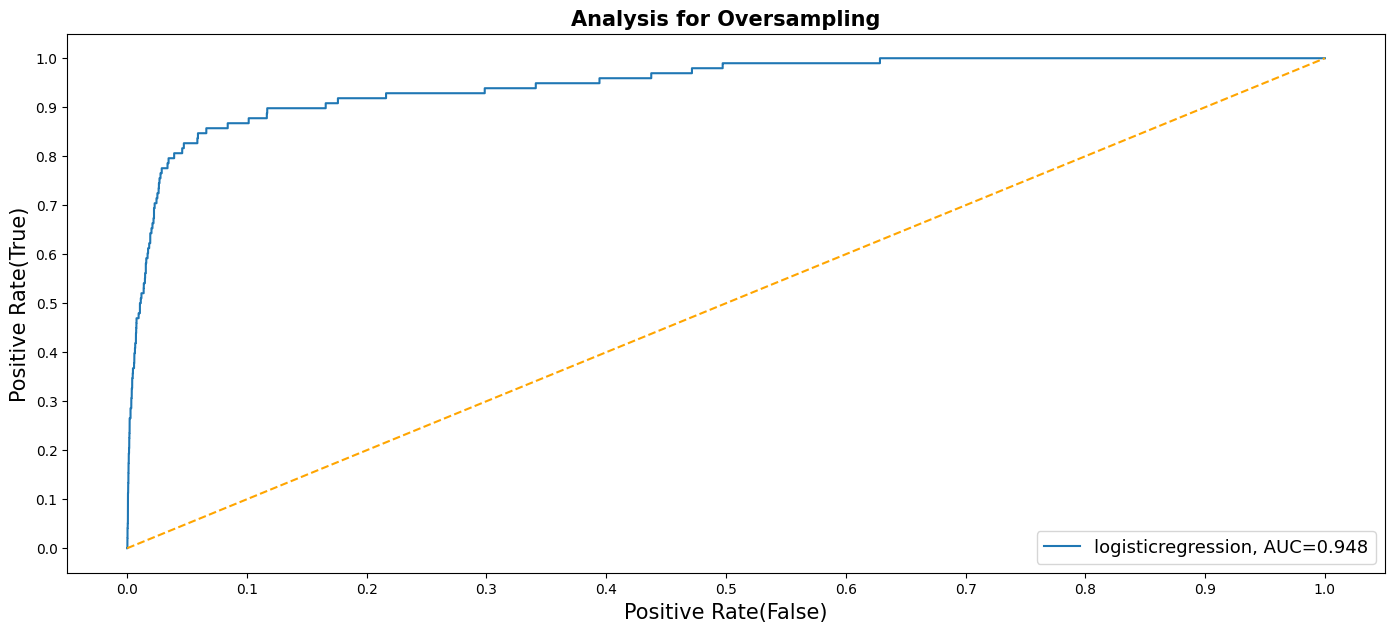

In [37]:
# Plot the ROC curve for undersampling
res_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for j in res_table.index:
    plt.plot(res_table.loc[j]['fpr'], 
             res_table.loc[j]['tpr'], 
             label="{}, AUC={:.3f}".format(j, res_table.loc[j]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Positive Rate(False)", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Positive Rate(True)", fontsize=15)
plt.title('Analysis for Oversampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

В идеале должно быть так 
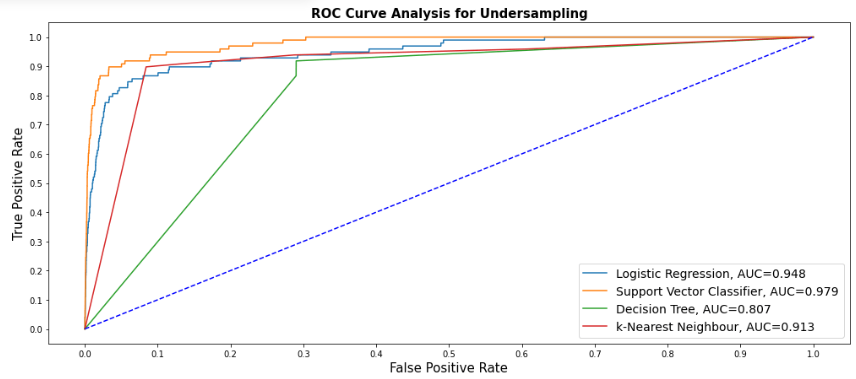

Эти модели были обучены с использованием undersampling метода NearMiss() на пяти различных моделях. Таким образом, если вы выполните приведенный выше код, вы увидите только одну кривую для модели LogisticRegression. Убедитесь, что скопировали этот блок и повторили его для других моделей, если хотите.

**Oversampling с SMOTE**

Одна из проблем при работе с несбалансированными данными заключается в том, что для успешного обучения модели на границе принятия решений слишком мало примеров из меньшинства. Одним из решений этой проблемы является oversampling, при котором увеличивается количество примеров из меньшинства. Прежде чем обучить модель, мы удваиваем примеры из меньшинства в обучающем наборе.

Создание новых примеров из меньшинства является улучшением по сравнению с простым повторением существующих примеров. Это особенно эффективный тип увеличения данных для табличных данных. В одной из работ демонстрируется, что сочетание oversampling для меньшинства и undersampling для большинства может улучшить производительность классификатора.

Аналогично, вы можете передать SMOTE() в параметр sampling нашей функции для выполнения oversampling:

In [38]:
# Cumulatively create a table for the ROC curve
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

lin_reg_os_results = get_model_best_estimator_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100], 
            'solver' : ['liblinear']},
    sampling=SMOTE(random_state=42),
    scoring="f1",
    is_grid_search=False,
    n_jobs=2,
)
print(f"==={lin_reg_os_results['estimator_name']}===")
print("Model:", lin_reg_os_results['best_estimator'])
print("Accuracy:", lin_reg_os_results['accuracy'])
print("Recall:", lin_reg_os_results['recall'])
print("F1 Score:", lin_reg_os_results['f1_score'])
res_table = res_table.append({'classifiers': lin_reg_os_results["estimator_name"],
                                        'fpr': lin_reg_os_results["fpr"], 
                                        'tpr': lin_reg_os_results["tpr"], 
                                        'auc': lin_reg_os_results["auc"]
                              }, ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

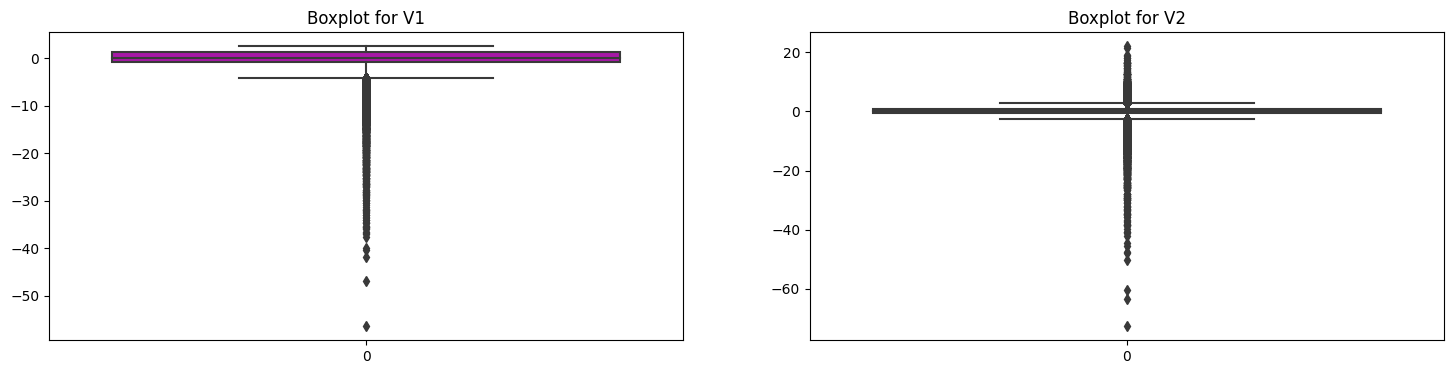

In [33]:
# boxplot for two example variables in the dataset

f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

variable1 = dataset["V1"]
variable2 = dataset["V2"]

sns.boxplot(variable1, color="m", ax=axes[0]).set_title('Boxplot for V1')
sns.boxplot(variable2, color="m", ax=axes[1]).set_title('Boxplot for V2')

plt.show()

In [34]:
# Находим межквартильный диапазон (IQR) для всех признаков в данных
# Обратите внимание, что мы также включаем переменную Class в эту оценку, хотя мы знаем, что на основе этого метода
# ни одно наблюдение не будет удалено, так как данная переменная является целевой.

quartile1 = dataset.quantile(0.25)  # Квартиль 1 (25-й процентиль), то есть значение, ниже которого находится 25% данных
quartile3 = dataset.quantile(0.75)  # Квартиль 3 (75-й процентиль), то есть значение, ниже которого находится 75% данных

IQR = quartile3 - quartile1  # Межквартильный диапазон, разница между квартилями 3 и 1
print(IQR)  # Выводим межквартильный диапазон для всех признаков


Time      1.000000
V1        2.236015
V2        1.402274
V3        1.917560
V4        1.591981
V5        1.303524
V6        1.166861
V7        1.124512
V8        0.535976
V9        1.240237
V10       0.989349
V11       1.502088
V12       1.023810
V13       1.311044
V14       0.918724
V15       1.231705
V16       0.991333
V17       0.883423
V18       0.999657
V19       0.915248
V20       0.344762
V21       0.414772
V22       1.070904
V23       0.309488
V24       0.794113
V25       0.667861
V26       0.567936
V27       0.161885
V28       0.131240
Amount    1.000000
Class     0.000000
dtype: float64



**Объяснение:**

1. **Квартиль 1 (Q1):** Это значение, ниже которого находится 25% всех наблюдений в наборе данных.
2. **Квартиль 3 (Q3):** Это значение, ниже которого находится 75% всех наблюдений.
3. **IQR (межквартильный диапазон):** Это разница между квартилем 3 и квартилем 1, который описывает диапазон, в котором находятся средние 50% данных.

Этот метод используется для определения выбросов. Величины, которые находятся за пределами диапазона `Q1 - 1.5 * IQR` и `Q3 + 1.5 * IQR`, могут быть расценены как выбросы.

In [40]:
# Теперь, когда у нас есть межквартильный диапазон (IQR) для каждого признака, мы удаляем наблюдения с выбросами.
# Мы использовали "константу для выбросов" равную 3:

constant = 3  # Определяем "константу для выбросов", которая будет использоваться для поиска выбросов.

# Удаляем выбросы
datavalid = dataset[~((dataset < (quartile1 - constant * IQR)) |(dataset > (quartile3 + constant * IQR))).any(axis=1)]
# В этой строке кода:
# 1. Мы проверяем, находятся ли значения признаков ниже чем Q1 - 3 * IQR или выше чем Q3 + 3 * IQR.
# 2. Используется оператор ~, который инвертирует условие, то есть отбирает все строки, не содержащие выбросы.
# 3. Функция `.any(axis=1)` применяется к каждой строке, проверяя, есть ли хотя бы одно значение, которое является выбросом по любому из признаков.
# 4. В результате мы получаем новый датасет `datavalid`, в котором удалены все строки с выбросами.

# Считаем количество удаленных строк
deletedrows = dataset.shape[0] - datavalid.shape[0]

# Выводим количество удаленных строк
print("We have removed " + str(deletedrows) + " rows from the data as outliers")


We have removed 53376 rows from the data as outliers


Инференс

In [41]:
# Обучаем модель на тренировочных данных
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = rfc.predict(X_test)

# Оценка производительности модели
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

# Вывод:
# The accuracy is 0.9996137776061234
# The precision is 0.975
# The recall is 0.7959183673469388
# The F1 score is 0.8764044943820225


The accuracy is 0.9995962220427653
The precision is 0.9629629629629629
The recall is 0.7959183673469388
The F1 score is 0.871508379888268


In [ ]:
# Предсказание на новых данных (напр
y_pred_new = rfc.predict(X_test)

# Печать результатов
print("Предсказания для новых данных:", y_pred_new)


Предсказания для новых данных: [1 0 0 ... 0 0 0]


#### 4. Кластеризация
Стандартизация данных (исключаем целевую переменную 'Class')


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop('Class', axis=1))  # Стандартизируем только признаки, без 'Class'

Понижение размерности с помощью PCA\
Применим PCA для снижения размерности данных до 2-х компонентов для дальнейшей визуализации.


C:\Users\Эльза\AppData\Local\Temp\ipykernel_19572\4114825344.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, s=50, palette='viridis')


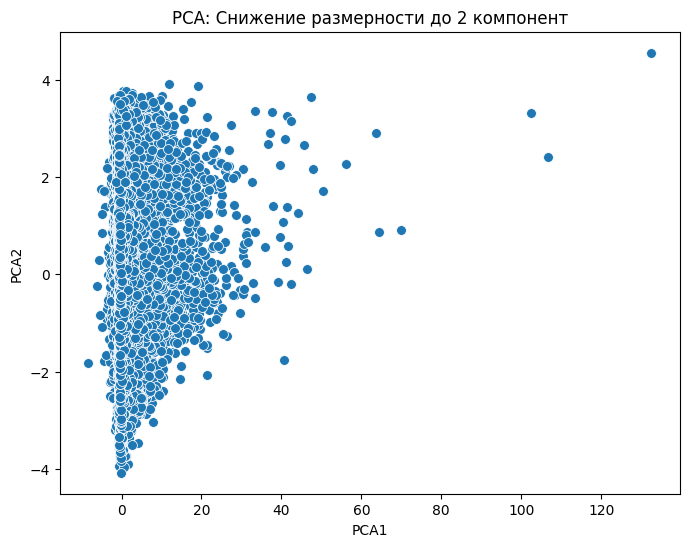

In [46]:
# Применяем PCA для снижения размерности до 2-х компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создаем DataFrame с результатами PCA для визуализации
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Визуализируем результаты понижения размерности
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, s=50, palette='viridis')
plt.title("PCA: Снижение размерности до 2 компонент")
plt.show()

Кластеризация с использованием KMeans \
Теперь применим алгоритм кластеризации **KMeans** на результатах PCA. Для этого выберем число кластеров (например, 2, так как в задаче детекции мошенничества можно ожидать два кластера: мошенничество и нормальные транзакции).


c:\Users\Эльза\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


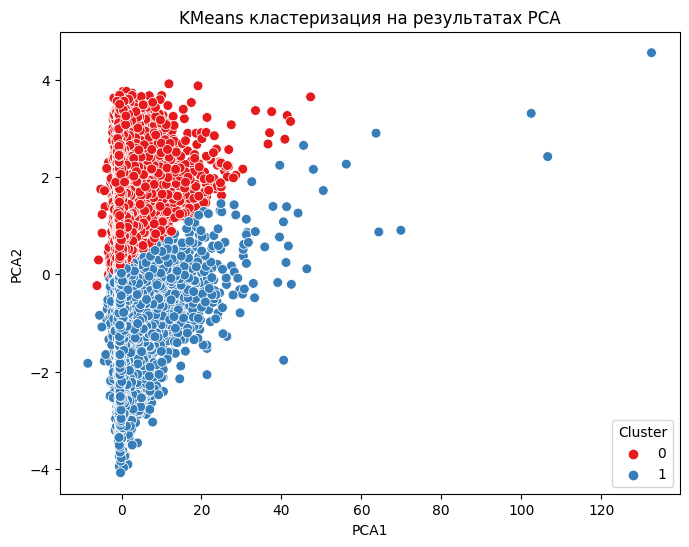

In [47]:
# Применяем кластеризацию KMeans (например, с 2 кластерами)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Получаем метки кластеров
pca_df['Cluster'] = kmeans.labels_

# Визуализируем кластеры
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=50, marker='o')
plt.title("KMeans кластеризация на результатах PCA")
plt.legend(title='Cluster')
plt.show()

Оценка качества кластеризации\
Для оценки качества кластеризации можно использовать **силуэтный коэффициент**. Он показывает, насколько хорошо отделены кластеры.



In [48]:
from sklearn.metrics import silhouette_score

# Оценка качества кластеризации с помощью силуэтного коэффициента
silhouette = silhouette_score(X_pca, kmeans.labels_)
print(f"Силуэтный коэффициент для кластеризации: {silhouette:.3f}")

KeyboardInterrupt: 

Метод локтя для выбора числа кластеров \
Для выбора оптимального числа кластеров, можно использовать метод локтя, который позволяет определить оптимальное количество кластеров на основе инерции модели.

c:\Users\Эльза\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Эльза\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Эльза\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Эльза\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

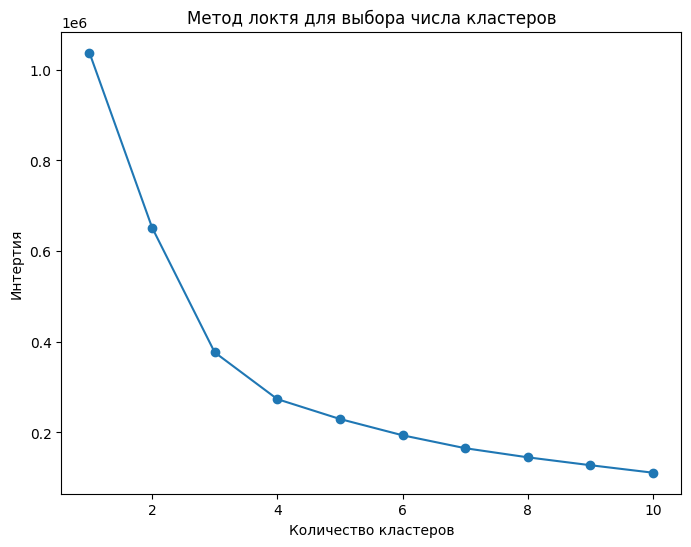

In [49]:
# Метод локтя для выбора оптимального числа кластеров
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя для выбора числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Интертия')
plt.show()

#### Применение в продакшн-системах
Системы, использующие этот датасет, могут быть внедрены в различные области:

1. **Финансовые учреждения**:
   - **Банки** и **кредитные компании** могут использовать такие системы для мониторинга транзакций в реальном времени и автоматической блокировки подозрительных операций.
   - **Мобильные приложения для управления картами** могут интегрировать модель, которая будет уведомлять пользователей о возможном мошенничестве, предотвращая финансовые потери.

2. **Платежные системы**:
   - **Платежные шлюзы** и платформы, такие как **PayPal** или **Stripe**, могут использовать ML-модели для фильтрации подозрительных транзакций и защиты как пользователей, так и продавцов от мошенничества.

3. **Электронная коммерция**:
   - **Интернет-магазины** могут интегрировать систему для оценки риска мошенничества при каждой оплате для обеспечения безопасности покупателей и продавцов.

---

#### Алгоритмы и методы для детекции мошенничества

Для решения задачи детекции мошенничества применяются различные классы алгоритмов:

1. **Алгоритмы для сбалансированных данных**:
   - **Логистическая регрессия**.
   - **Метод опорных векторов (SVM)**.
   - **Случайный лес (Random Forest)**.
   
   Эти алгоритмы используются при условии, что классы сбалансированы, однако в реальных системах для данных с **дисбалансом классов** часто используются методы подбора выборок или специальные алгоритмы.

2. **Алгоритмы для несбалансированных данных**:
   - **SMOTE (Synthetic Minority Over-sampling Technique)** для увеличения числа примеров мошенничества.
   - **NearMiss** для уменьшения числа нормальных транзакций.
   - **Алгоритмы ансамбля**, такие как **XGBoost** или **LightGBM**, которые могут использовать взвешивание классов для борьбы с дисбалансом.

---

#### Преимущества и недостатки использования датасета в продакшн-системах

##### Преимущества:
1. **Подходит для реальных задач**:
   - Датасет отражает типичное соотношение классов в реальных данных (мошенничество крайне редко).
   
2. **Легкость в использовании**:
   - Датасет уже очищен и структурирован, что делает его хорошим выбором для применения в продакшн-системах.

3. **Снижение числа ложных срабатываний**:
   - Алгоритмы, обученные на этом датасете, могут значительно снизить число ложных срабатываний, что важно в сфере безопасности.

##### Недостатки:
1. **Дисбаланс классов**:
   - Дисбаланс между нормальными транзакциями и мошенничеством (менее 1%) может привести к плохим результатам для метрик, таких как **accuracy**, и потребует применения специализированных методов, таких как oversampling или undersampling.
   
2. **Отсутствие информации о некоторых транзакциях**:
   - Анонимные признаки могут быть полезны, но также могут ограничивать интерпретацию модели.

3. **Сложность адаптации в реальном времени**:
   - Внедрение в продакшн-систему требует высокой производительности модели, особенно если система должна работать в реальном времени с миллионами транзакций.

---

#### Пример использования в продакшн-системе

**Пример**: В **банковской системе** используется модель для мониторинга транзакций в реальном времени. Система отслеживает транзакции по картам клиентов и анализирует их с помощью обученной модели для обнаружения мошенничества. При обнаружении аномальной транзакции, система автоматически блокирует её до подтверждения от клиента, минимизируя потери.
